AICE Associate test

In [38]:
import seaborn as sns
import matplotlib as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [23]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [74]:
# df_o = sns.load_dataset('titanic') # 분류 : 생존자(suvived) 예측
df_o = sns.load_dataset('diamonds') # 회귀 : 가격(price) 예측
df = df_o.copy()
print(df.isnull().sum())
print(df.nunique())
print(df.info())
print(df.head())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None
   carat      cut color clari

In [33]:
# print(df['suvieved'].value_counts())
# print(df['price'].value_counts())

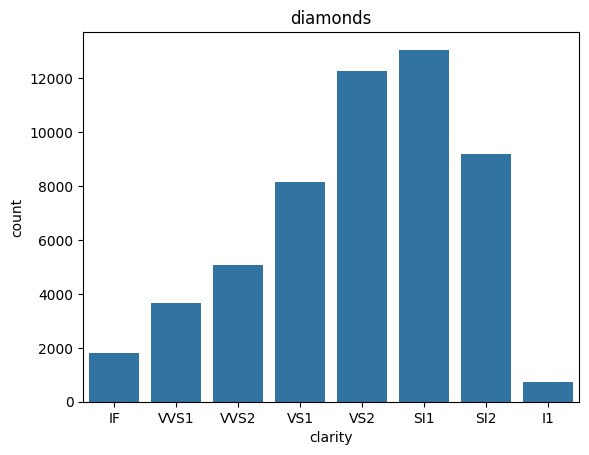

In [40]:
sns.countplot(data=df, x='clarity')
plt.title('diamonds')
plt.show()

In [45]:
print(df['clarity'].value_counts())

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


In [75]:
df = df[df['clarity'] != 'I1']
print(df['clarity'].value_counts())

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1          0
Name: count, dtype: int64


In [71]:
df.describe() # carot 의 경우 mean 과 50% 의 차이 10%가 넘어감, 이상치가 많을 가능성. 가격은 회귀 target 이므로 상관 x

,carat,depth,table,price,x,y,z
count,53198.000000,53198.000000,53198.000000,53198.000000,53198.000000,53198.000000,53198.000000
mean,0.791121,61.735672,57.445363,3932.642336,5.716737,5.720874,3.529366
std,0.467743,1.398488,2.227238,4002.990724,1.116176,1.137593,0.700954
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2388.000000,5.680000,5.700000,3.520000
75%,1.040000,62.500000,59.000000,5327.000000,6.530000,6.530000,4.030000
max,3.040000,79.000000,95.000000,18823.000000,9.510000,58.900000,31.800000


In [76]:
counts = df['carat'].value_counts()
print(counts) # 257
print((counts > 2).sum()) # 238, 값 대체 시 median 이나 mean 값으로 대체 replace()

carat
0.30    2603
0.31    2248
1.01    2209
0.70    1937
0.32    1835
        ... 
2.64       1
2.75       1
2.63       1
2.65       1
2.59       1
Name: count, Length: 257, dtype: int64
238


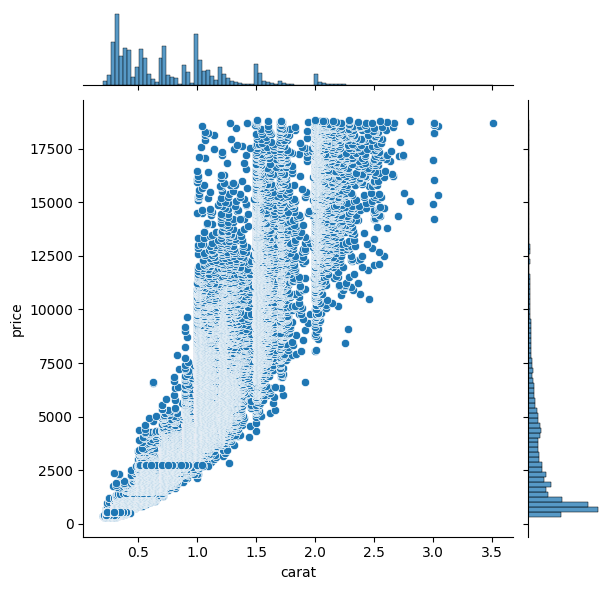

In [79]:
# 이상치 제거 : 데이터에 따라 이상치를 제거하지 말아야 하는 데이터도 있음 -> 이상치가 분석에 유의미한 영향을 미치는 경우
sns.jointplot(data=df, x='carat', y='price') # carat 3.5에 이상치 1개 (price 17500)

In [69]:
df = df[df['carat'] < 3.2] # 이상치 제거

{'whiskers': [<matplotlib.lines.Line2D at 0x2bbc0e73c10>,
 'caps': [<matplotlib.lines.Line2D at 0x2bbc0e80f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bbc0e73410>],
 'medians': [<matplotlib.lines.Line2D at 0x2bbc0e81c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bbc0e82450>],
 'means': []}

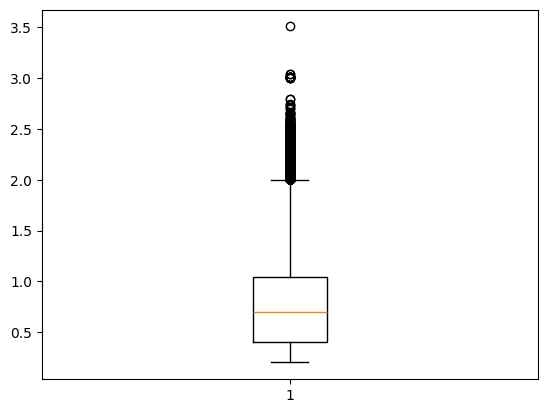

In [81]:
plt.boxplot(data=df, x='carat') # boxplot으로 이상치 제거 확인

In [83]:
df.corr(numeric_only=True)

ValueError: could not convert string to float: 'Ideal'